### Consigna:
* Graficar una serie de  tiempo de los ejemplos del repositorio

* Redactar un informe describiendo tres series de tiempo distintas(máx.3
páginas)

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### Catfish.csv: Venta de bagres a lo largo del tiempo

In [2]:
catfish = pd.read_csv("./Datasets/catfish.csv",  header=0, index_col=0, parse_dates=True)

In [3]:
catfish.head()

,Total
Date,
1986-01-01,9034
1986-02-01,9596
1986-03-01,10558
1986-04-01,9002
1986-05-01,9239


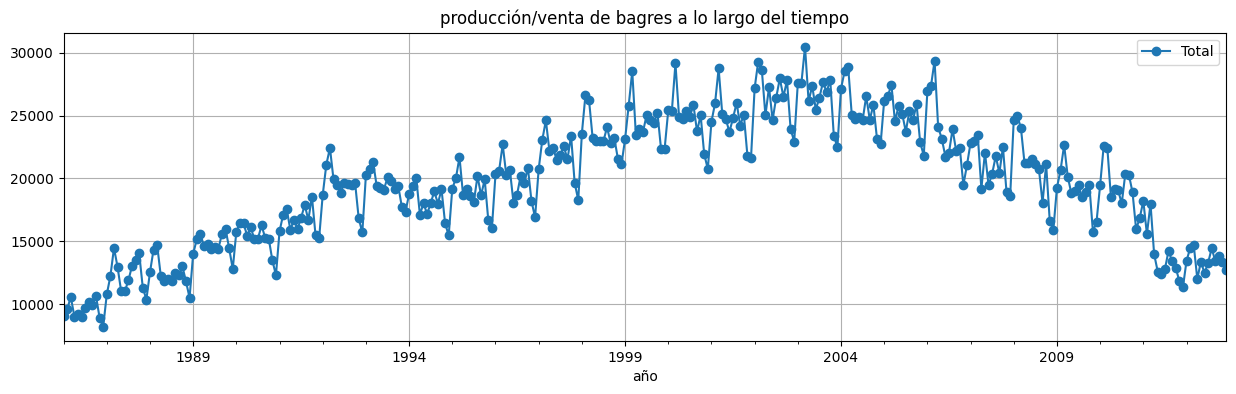

In [4]:
plt.figure(figsize=(15,4))
catfish.plot(marker="o", ax=plt.gca())
plt.title("producción/venta de bagres a lo largo del tiempo")
plt.xlabel("año")
plt.grid(True)

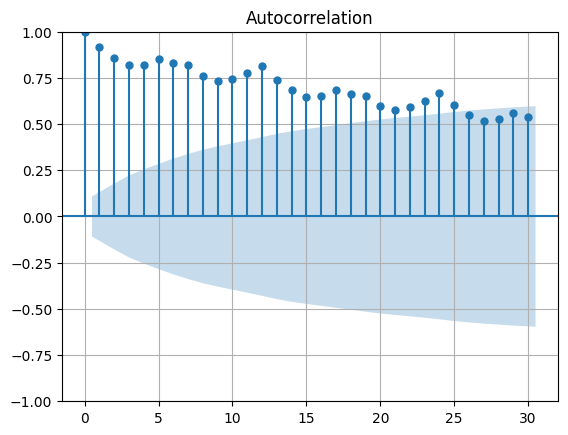

In [6]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(catfish, lags=30)
plt.grid(True)
plt.show()

##### Conclusiones

* Se observa que es una serie de tiempo discreta, univariada y no estacionaria.
* Se observa una autocorrelacion alta. Ciclos con frecuencia determinada cada 12 meses
* Tendencia decreciente
* No parece seguir un random walk por la estructura de autocorrelación que tiene 



#### BYMA: cotización de la bolsa de valores de Argentina


In [7]:
byma = pd.read_csv(
    "./Datasets/BYMA.csv",  header=0, index_col=0, 
)

byma.fechaHora = pd.to_datetime(byma.fechaHora, infer_datetime_format=True)
byma = byma.set_index("fechaHora")

/var/folders/30/4fg_jqmn6t5bqy5p8vdxjmpr0000gp/T/ipykernel_1599/2074999271.py:5: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  byma.fechaHora = pd.to_datetime(byma.fechaHora, infer_datetime_format=True)


<Axes: xlabel='fechaHora'>

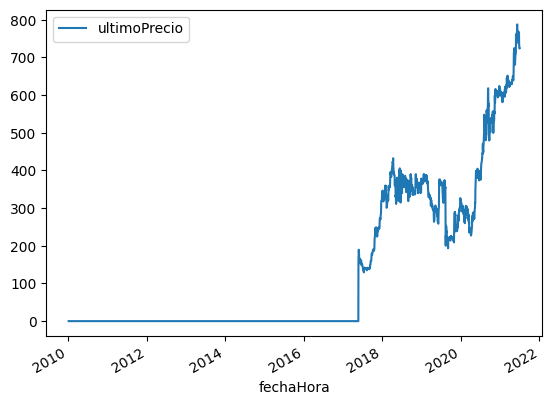

In [8]:
byma.plot()

In [9]:
num_zeros = (byma.ultimoPrecio == 0.0).sum().sum()
num_zeros

1773

In [10]:
# Borramos los que son 0.0
byma = byma[(byma != 0.0).all(axis=1)]
len(byma)

998

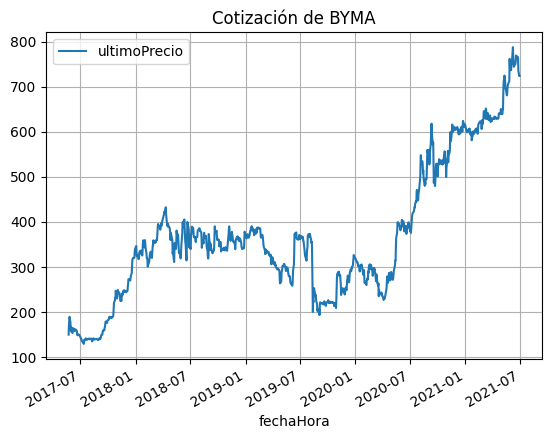

In [11]:
byma.plot()
plt.title("Cotización de BYMA")
plt.grid(True)

##### Conclusiones

* Se observa que es una serie de tiempo discreta, univariada, no estacionaria y no estacional.
* Se ve  una tendencia alcista apartir de julio 2020.
* Aparenta segiur un proceso de random walk

#### Estadisticas de temperatura



In [12]:
temp = pd.read_csv("./Datasets/new_estadisticas.txt", sep="\t", encoding="latin-1")

In [15]:
temp
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608 entries, 0 to 607
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Estaciï¿½n      608 non-null    object
 1   Valor Medio de  608 non-null    object
 2   Ene             608 non-null    object
 3   Feb             608 non-null    object
 4   Mar             608 non-null    object
 5   Abr             608 non-null    object
 6   May             608 non-null    object
 7   Jun             608 non-null    object
 8   Jul             608 non-null    object
 9   Ago             608 non-null    object
 10  Sep             608 non-null    object
 11  Oct             608 non-null    object
 12  Nov             608 non-null    object
 13  Dic             608 non-null    object
dtypes: object(14)
memory usage: 66.6+ KB


In [18]:
# Convertir a float

for col in temp.columns[2:]:
    temp[col] = pd.to_numeric(temp[col], errors="coerce")

temp.fillna(np.nan, inplace=True)

In [22]:
# renombro columnas

temp.columns = ["est", "val", 1,2,3,4,5,6,7,8,9,10,11,12]

In [36]:
metrics = [ 
("precipitacion", temp[(temp["val"] == "Precipitaciï¿½n (mm)")]),
("temperatura_media",  temp[(temp["val"] == "Temperatura (ï¿½C)")]),
("temperatura_maxima", temp[(temp["val"] == "Temperatura mï¿½xima (ï¿½C)")]),
("temperatura_minima", temp[(temp["val"] == "Temperatura mï¿½nima (ï¿½C)")]),
("humedad_relativa", temp[(temp["val"] == "Humedad relativa (%)")]),
("velocidad_viento", temp[(temp["val"] == "Velocidad del Viento (km/h)")]),
("nubosidad_total", temp[(temp["val"] == "Nubosidad total (octavos)")]),
("frecuencia_precipitacion",  temp[(temp["val"] == "Frecuencia de dï¿½as con Precipitaciï¿½n superior a 0.1 mm")]) ]   

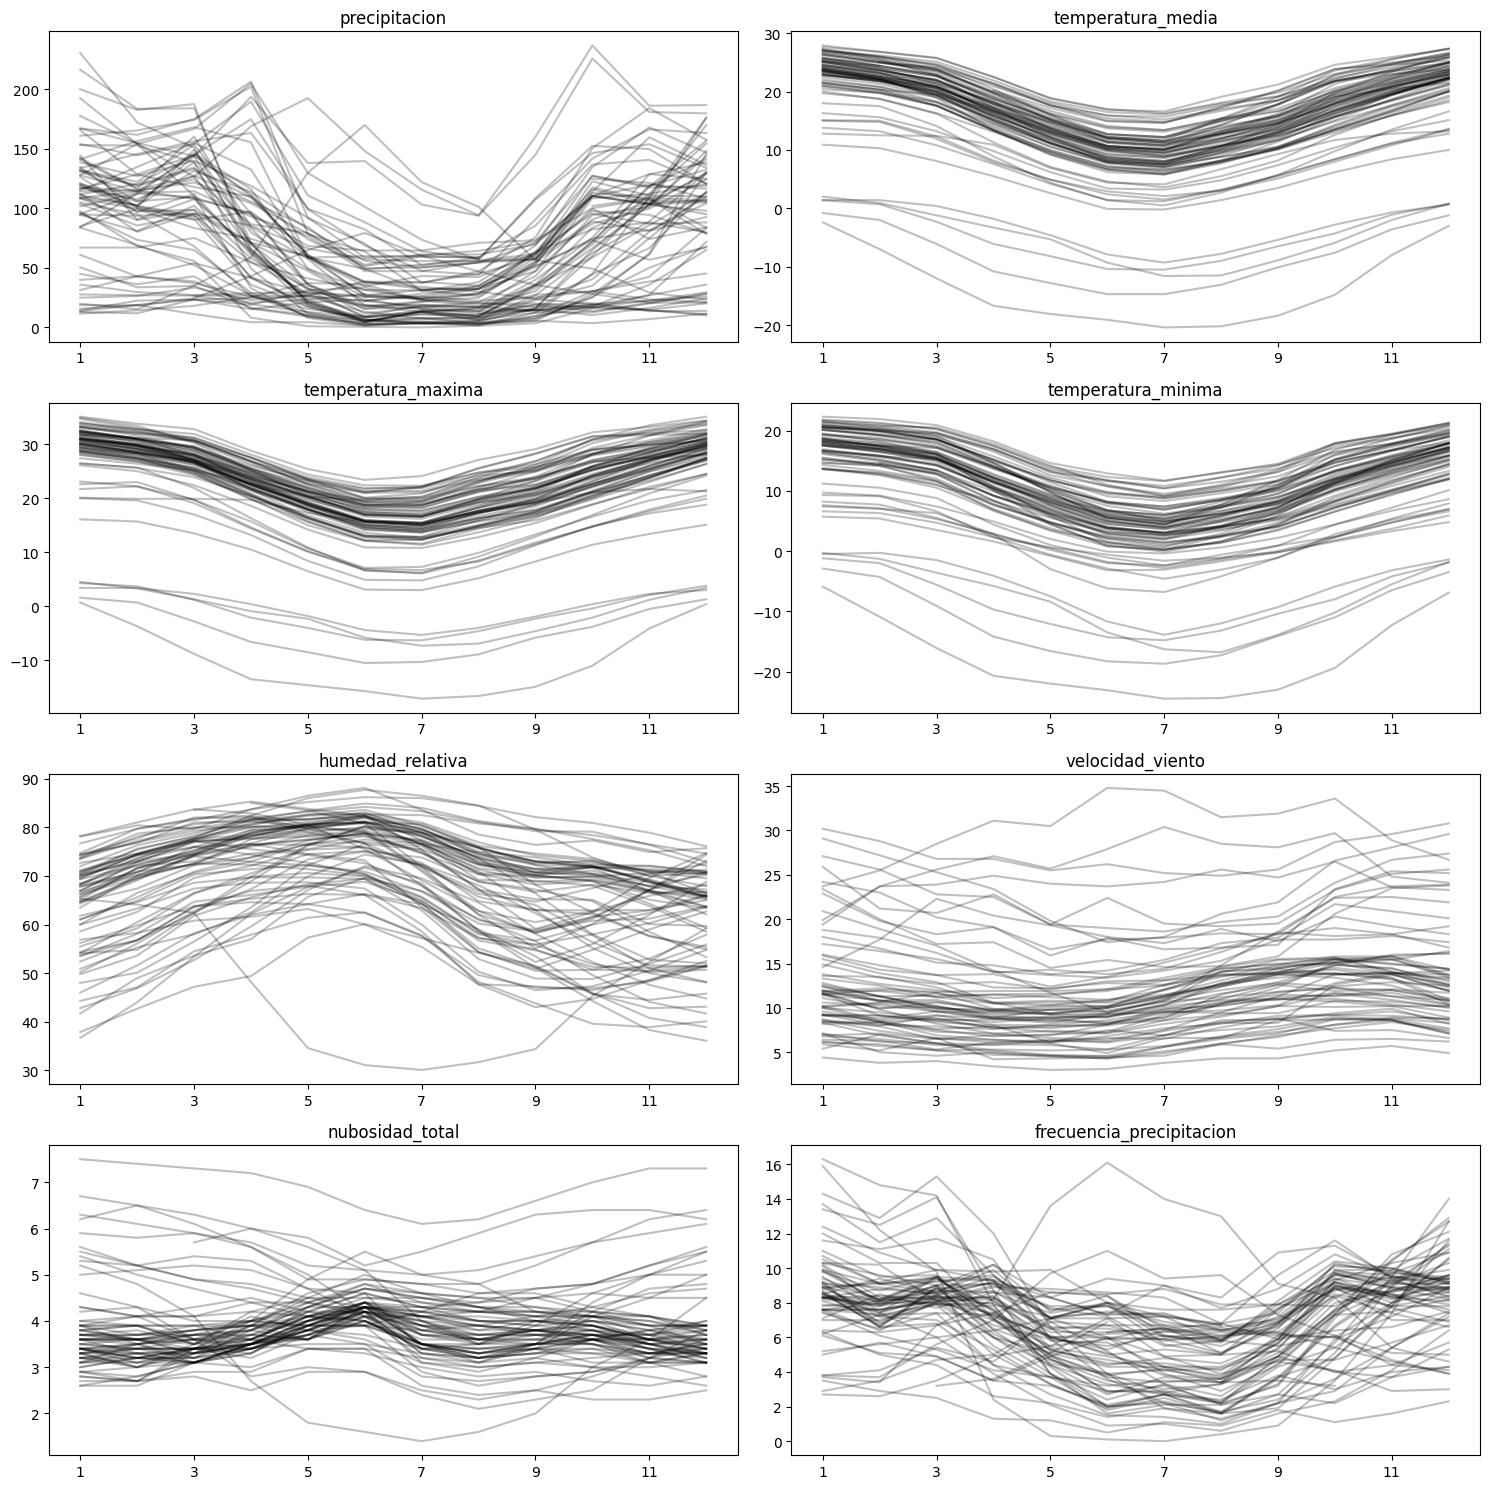

In [40]:
fig, axs = plt.subplots(nrows=len(metrics)//2, ncols=2, figsize=(15, 15))

for i, (metric_name, filtered_data) in enumerate(metrics):
    ax = axs[i // 2, i % 2]
    filtered_data.T[2:].plot(ax=ax, color="k", legend=False, alpha=0.25)
    ax.set_title(metric_name)
plt.tight_layout()
plt.show()

In [223]:
from sklearn.cluster import KMeans


In [228]:
matriz_prec = precipitacion.dropna()[precipitacion.columns[2:]]


In [232]:
km = KMeans(n_clusters=3)
km.fit(matriz_prec)

KMeans(n_clusters=3)

<Axes: >

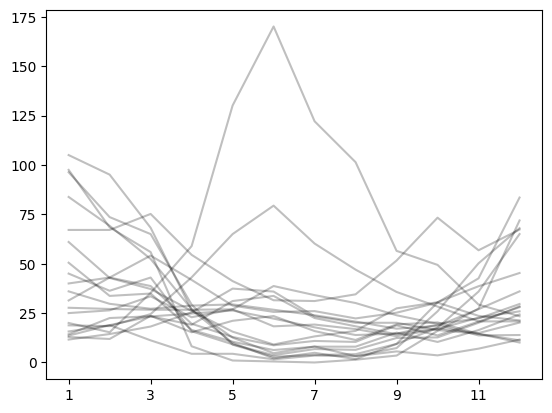

In [238]:
matriz_prec[km.labels_ == 0].T.plot(color="k", legend=False, alpha=0.25)

<Axes: >

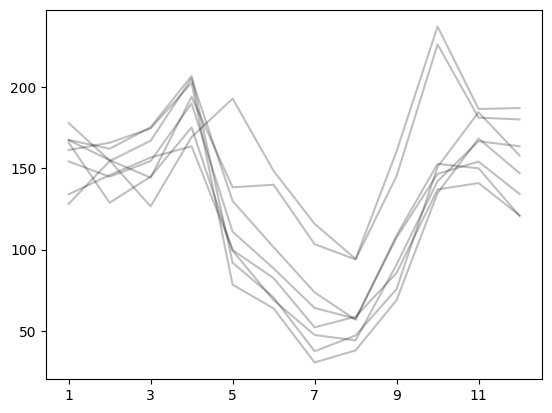

In [240]:
matriz_prec[km.labels_ == 2].T.plot(color="k", legend=False, alpha=0.25)

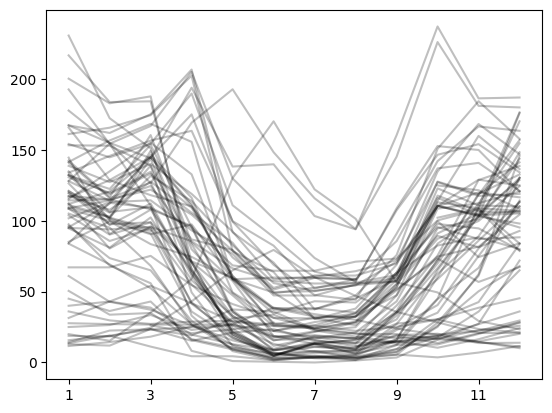

In [197]:
precipitacion.columns = ["est", "val", 1,2,3,4,5,6,7,8,9,10,11,12]
for i in range(len(precipitacion)):
    precipitacion.iloc[i][2:].plot(color="k", alpha=0.25)

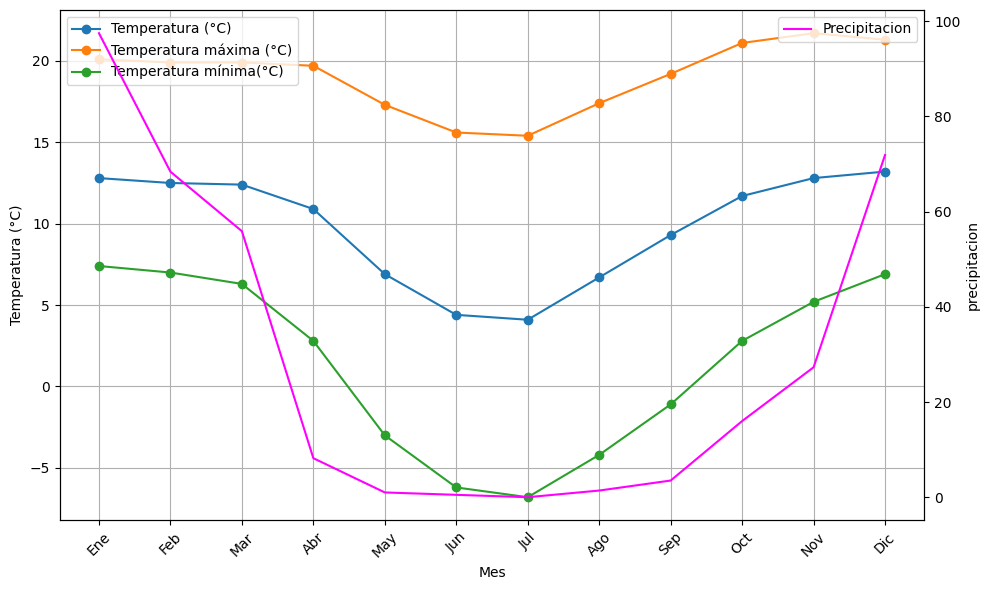

In [122]:
fig, ax1 = plt.subplots(figsize=(10,6))

# temperatura
ax1.plot(temp.columns[2:], temp.iloc[0, 2:], marker='o', label='Temperatura (°C)')
ax1.plot(temp.columns[2:], temp.iloc[1, 2:], marker='o', label='Temperatura máxima (°C)')
ax1.plot(temp.columns[2:], temp.iloc[2, 2:], marker='o', label='Temperatura mínima(°C)')

ax1.set_xlabel('Mes')
ax1.set_ylabel('Temperatura (°C)')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True)
ax1.legend(loc = "upper left")
#plt.tight_layout()
#plt.title('Temperatura media, máxima y minima - LA QUIACA')

ax2 = ax1.twinx()
ax2.plot(temp.columns[2:], temp.iloc[6,2:], label="Precipitacion", color="magenta")
ax2.set_ylabel("precipitacion")
ax2.legend(loc="upper right")
plt.tight_layout()


plt.show()